In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df_train = pd.read_csv('../datasets/original_files/train.csv',keep_default_na=False,na_values='')
df_test = pd.read_csv('../datasets/original_files/test.csv',keep_default_na=False,na_values='')

In [5]:
df_train.shape, df_test.shape

((2051, 81), (878, 80))

Amending column names to lower case, replacing space with underscore.

In [6]:
df_train.columns = df_train.columns.str.lower().str.replace(' ','_')
df_test.columns = df_test.columns.str.lower().str.replace(' ','_')

Dropping a couple of unnecessary columns here: PID and Garage Year Built.

In [7]:
df_train = df_train.drop(columns=['pid','garage_yr_blt'])
df_test = df_test.drop(columns=['pid','garage_yr_blt'])

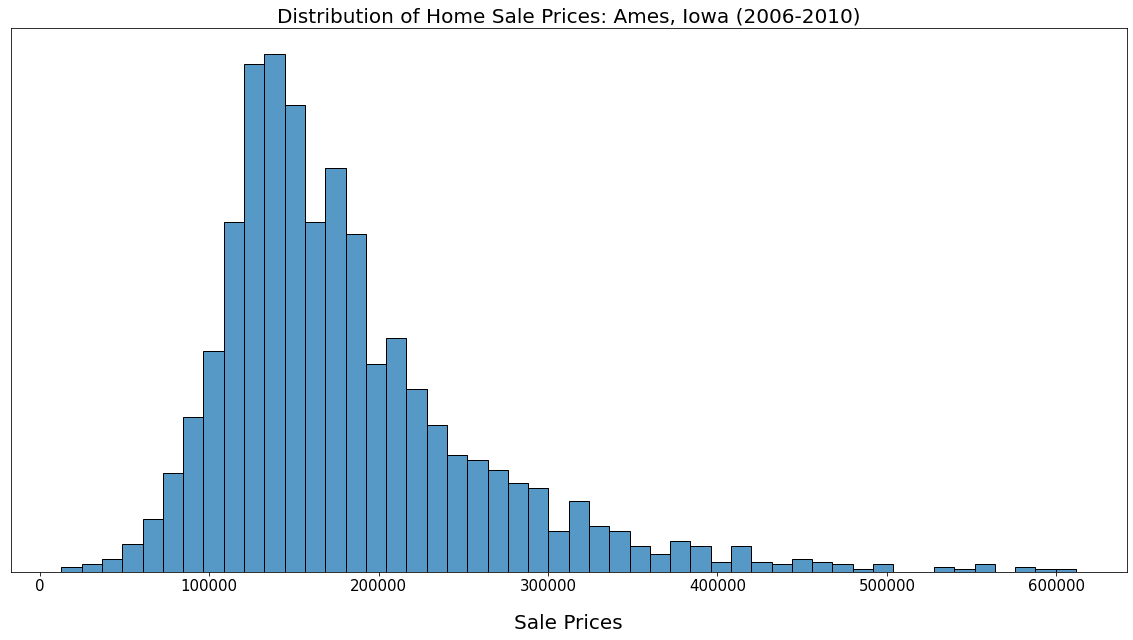

In [8]:
plt.figure(figsize=(20,10))
sns.histplot(df_train["saleprice"],bins=50).set(ylabel=None,yticklabels=[],yticks=[])
plt.xlabel('Sale Prices',labelpad=20,fontsize=20)
plt.xticks(fontsize=15)
plt.title('Distribution of Home Sale Prices: Ames, Iowa (2006-2010)',fontsize=20);

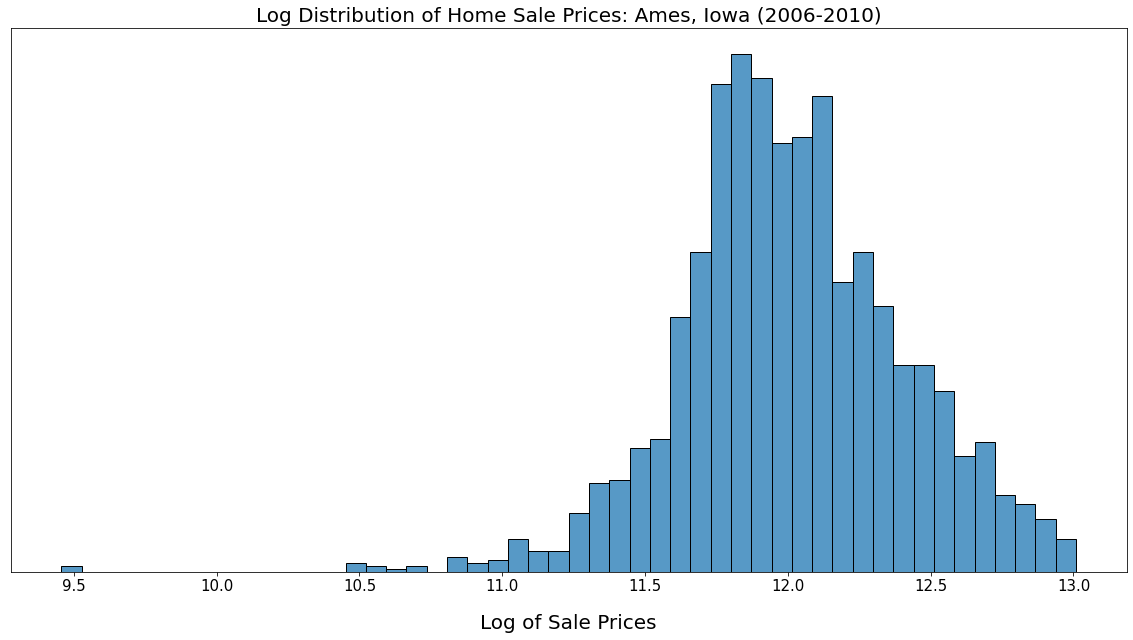

In [22]:
plt.figure(figsize=(20,10))
sns.histplot(np.log(df_train["saleprice"]),bins=50).set(ylabel=None,yticklabels=[],yticks=[])
plt.xlabel('Log of Sale Prices',labelpad=20,fontsize=20)
plt.xticks(fontsize=15)
plt.title('Log Distribution of Home Sale Prices: Ames, Iowa (2006-2010)',fontsize=20);

Keeping in mind the data science question, I removed homes with sale prices above $450,000. I intend for this analysis to be relevant to university staff and faculty, with our analysis focusing on homes that we might reasonably expect these individuals to own/buy. This dropped 24 houses from our dataset.

In [9]:
df_train = df_train[df_train['saleprice'] < 450000]

In [10]:
df_train.shape

(2027, 79)

### Ordinal Encoding

Manually built ordinal library of all ordinal fields and assigned values.

In [11]:
ord_lib = {'Reg': 4,'IR1':3,'IR2':2,'IR3':1,'AllPub':1,'NoSewr':0,'NoSeWa':0,'ELO':0,'Gtl':3,'Mod':2,'Sev':1,'10':10,'9':9,'8':8,'7':7,'6':6,\
'5':5,'4':4,'3':3,'2':2,'1':1,'Av':3,'Mn':2,'PosA':3,'PosN':2,'Norm':1,'Artery':0,'Feedr':0,'RRNn':0,'RRAn':0,'RRNe':0,'RRAe':0,\
'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'No':0,'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1,\
'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'Fin':3,'RFn':2,'Y':2,'P':1,'N':0,'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1}

List of all ordinal features

In [12]:
ordinal_cols = df_train[['overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual',\
'bsmt_cond','bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual','functional',\
'fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence',\
'lot_shape','utilities','land_slope','bsmt_exposure','condition_1','condition_2']]

In [13]:
ordinal_cols2 = df_test[['overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual',\
'bsmt_cond','bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual','functional',\
'fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence',\
'lot_shape','utilities','land_slope','bsmt_exposure','condition_1','condition_2']]

In [14]:
for i in ordinal_cols.columns:
    df_train.replace({i: ord_lib},inplace = True)

In [15]:
for i in ordinal_cols2.columns:
    df_test.replace({i: ord_lib},inplace = True)

### Column Combination/Alteration

Creating composite score for area's quality using the condition 1 and 2 columns, which assign qualitiative assessments of the surrounding area, which I have converted into numeric values.

In [16]:
df_test['area_qual'] = df_test['condition_1'] + df_test['condition_2']
df_train['area_qual'] = df_train['condition_1'] + df_train['condition_2']
df_train = df_train.drop(columns=['condition_1','condition_2'])
df_test = df_test.drop(columns=['condition_1','condition_2'])

Replacing 'year built' and 'year remodeled' column with columns for ages and years since remodeling so they can serve as continous variables.

In [17]:
df_train['age'] = df_train['yr_sold'] - df_train['year_built']
df_train['yrs_sincerm'] = df_train['yr_sold'] - df_train['year_remod/add']
df_train = df_train.drop(columns=['year_built','year_remod/add'])

df_test['age'] = df_test['yr_sold'] - df_test['year_built']
df_test['yrs_sincerm'] = df_test['yr_sold'] - df_test['year_remod/add']
df_test = df_test.drop(columns=['year_built','year_remod/add'])

In [18]:
df_train.describe()

,id,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,area_qual,age,yrs_sincerm
count,2027.000000,2027.000000,1698.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2006.000000,2027.000000,2027.000000,2026.000000,2026.000000,2023.000000,2026.000000,2026.000000,2025.000000,2026.000000,2026.000000,2026.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2025.000000,2025.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,1476.234336,57.222496,68.813310,9969.845585,3.599408,0.999013,3.078934,6.072521,5.566848,94.339980,3.389739,3.084854,3.475814,2.929418,0.950568,3.549358,433.498519,1.274568,47.573544,565.069595,1046.141658,4.148495,4.884065,1153.922546,326.503207,5.296004,1485.721756,0.422716,0.064198,1.568821,0.366058,2.841145,1.043414,3.500247,6.398619,7.842625,0.581154,1.736556,1.712734,1.761599,468.621422,2.800099,2.809477,1.831771,92.726196,46.766157,22.804637,2.622102,15.567341,2.426246,0.015294,0.579674,52.185002,6.222003,2007.776024,177568.413912,1.895412,36.409472,23.837691
std,843.033223,42.972090,23.206178,6622.475755,0.564112,0.031404,0.408069,1.385715,1.106762,166.183002,0.569939,0.371362,0.890364,0.571291,1.468606,2.121444,450.016944,0.944963,162.820018,442.365222,435.539105,0.965420,0.404659,384.635878,421.200165,49.800978,484.951124,0.521360,0.253098,0.544718,0.499943,0.823773,0.210977,0.650290,1.520170,0.684332,0.633625,1.799874,0.895754,0.756161,211.270567,0.720096,0.717492,0.537642,127.167578,66.121889,60.140788,25.377024,55.442150,38.004791,0.237756,1.214401,576.752561,2.748786,1.310282,70887.597221,0.426091,30.124504,21.012449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,-1.000000,-2.000000
25%,761.500000,20.000000,58.000000,7500.000000,3.000000,1.000000,3.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,219.250000,789.000000,3.000000,5.000000,877.500000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,8.000000,0.000000,0.000000,1.000000,1.000000,315.250000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,2.000000,7.000000,4.000000
50%,1486.000000,50.000000,68.000000,9360.000000,4.000000,1.000000,3.000000,6.000000,5.000000,0.000000,3.000000,3.000000,4.000000,3.000000,0.000000,4.000000,364.500000,1.000000,0.000000,473.500000,990.000000,5.000000,5.000000,1090.000000,0.000000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000

Train dataset now has some negative numbers for age/years since remodelling. Negative age likely due to delay in paperwork filed with city officials, leading to the house being sold prior to the city registering the house. These values set to 0. Negative years since remodelling signify houses for which remodels were done after sale, and the scraping of the city data system yielded the result. Since that remodel is immaterial to the sale, and we cannot know when the previous remodel was done, these values will be set equal to age.

In [19]:
df_train['age'] = [0 if i < 0 else i for i in df_train['age']]
df_train.loc[(df_train['yrs_sincerm'] < 0 ), 'yrs_sincerm'] = df_train['age']

### Outlier Analysis

Upon performing EDA, identified two houses with lot frontage close to 100% higher than the nearest lot frontages. These will be removed from analysis for the purpose of contributing to more effective modeling. One house had a lot area ~40% higher than the next largest area, this was removed as well. Two houses with an above ground living area of ~33% above the next largest data point was also removed.

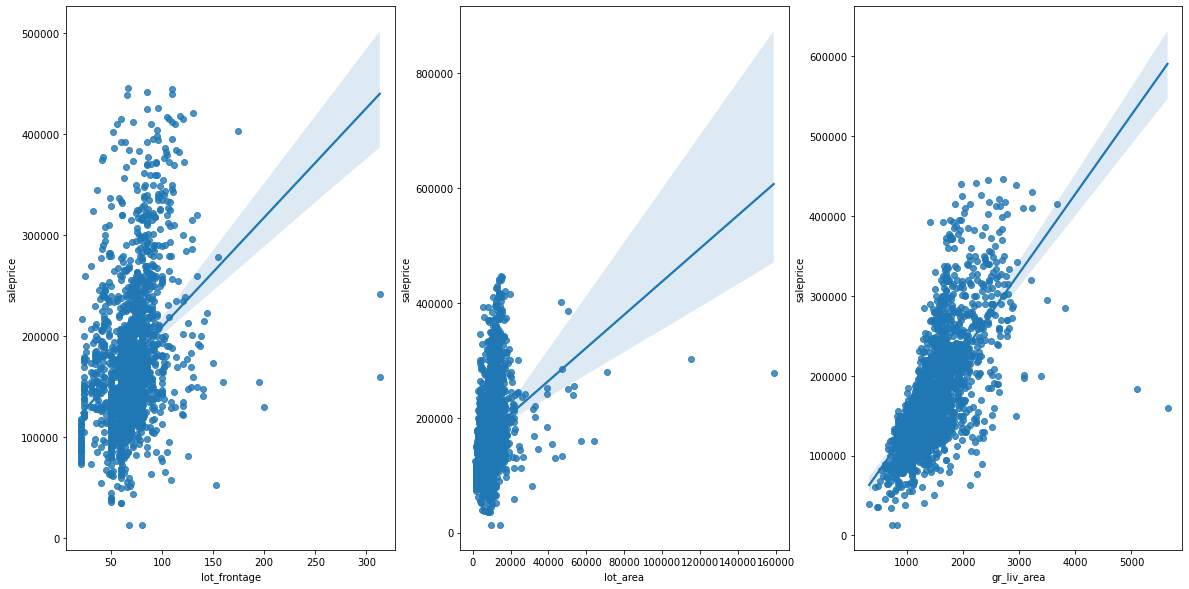

In [20]:
fig,ax = plt.subplots(1,3,figsize=(20,10))
sns.regplot(x='lot_frontage',y='saleprice', data=df_train,ax=ax[0])
sns.regplot(x='lot_area',y='saleprice', data=df_train,ax=ax[1])
sns.regplot(x='gr_liv_area',y='saleprice', data=df_train,ax=ax[2]);

In [20]:
df_train.drop(df_train[df_train['lot_frontage'] > 300].index,inplace=True)                                  
df_train = df_train[df_train['lot_area'] < 110000]
df_train = df_train[df_train['gr_liv_area'] < 4000]

In [21]:
df_train.shape, df_test.shape

((2022, 78), (878, 77))

### Train Test Split

In [22]:
X = df_train.drop(columns='saleprice')
y = df_train['saleprice']

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=25)

### Lets start by taking a look at the missing values in Train

In [24]:
X_train.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

lot_frontage      239
mas_vnr_area       15
mas_vnr_type       15
bsmt_exposure       3
bsmt_full_bath      2
bsmt_half_bath      2
garage_finish       1
bsmtfin_type_1      1
bsmt_qual           1
bsmtfin_sf_1        1
garage_cars         1
garage_area         1
bsmtfin_type_2      1
bsmtfin_sf_2        1
garage_qual         1
garage_cond         1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_cond           1
dtype: int64

For lot frontage, I was interested to see whether it was possible that these were valid null entries, that these houses did not have frontage because there were apartments, for instance. After looking through a the possible values for a few of the features that might indicate the answer, I decided that all of the properties in this dataset should have frontages. I decided that the best way to assign values to these missing entries is by taking the mean of the other properties that had the same lot configuration (culdesac, corner lot, interior lot.)

In [25]:
lc_lf_mean = X_train['lot_frontage'].groupby(X_train['lot_config']).mean()
lf_mean = dict(lc_lf_mean)

Writing function to apply means I calculated to the missing values in the lot_frontage column. 

In [26]:
def assign_lot_front(mean_dict,dataframe):
    for k,v in mean_dict.items():
        dataframe.loc[(dataframe['lot_frontage'].isna()) & (dataframe['lot_config'] == k), 'lot_frontage'] = int(v)

Applying same function to train, val and test.

In [27]:
assign_lot_front(lf_mean,X_train)
assign_lot_front(lf_mean,X_val)
assign_lot_front(lf_mean,df_test)

In [28]:
X_train.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]
X_val.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

mas_vnr_type      6
mas_vnr_area      6
bsmt_exposure     1
bsmtfin_type_2    1
dtype: int64

After further review of the remaining missing data, elected to proceed with a simple imputer that replaces missing data with the most frequent value for that feature. Values fitted from train applied to validation and test data.

In [29]:
si = SimpleImputer(strategy='most_frequent')

In [30]:
X_train_f = si.fit_transform(X_train)
X_train_f = pd.DataFrame(X_train_f,columns=X_train.columns)

In [31]:
X_val_f = si.transform(X_val)
X_val_f = pd.DataFrame(X_val_f,columns=X_val.columns)
df_test_f = si.transform(df_test)
df_test_f = pd.DataFrame(df_test_f,columns=df_test.columns)

### Missing Data has now been Replaced

In [32]:
X_train_f.shape,X_val_f.shape

((1516, 77), (506, 77))

In [33]:
df_test_f.shape

(878, 77)

In [34]:
X_train_f.to_csv('../datasets/clean_filled/xtrain_clean.csv', index=False)
X_val_f.to_csv('../datasets/clean_filled/xval_clean.csv', index=False)
y_train.to_csv('../datasets/clean_filled/ytrain_clean.csv', index=False)
y_val.to_csv('../datasets/clean_filled/yval_clean.csv', index=False)
df_test_f.to_csv('../datasets/clean_filled/test_clean.csv', index=False)